# Exercise Sheet 3: Head Modeling & Non-linear dynamics

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as signal
import bci_minitoolbox as bci

In [2]:
def logistic(h,a=1):
    return 1/(1+np.exp(-a*h))
signtrafunc=lambda h: (np.sign(h)+1)/2
def gaussRBF(h,a=1):
    return np.exp(-(a*h)**2)

def phi_dip(r, Q, r_0=None,sigma=0.33):
    r=np.array(r)
    Q=np.array(Q)    
    if r_0 is not None:
        r_0=np.array(r_0)
        r=(r.T-r_0).T
    return 1/(4*np.pi*sigma)*(np.tensordot(Q,r,1))/np.power(np.linalg.norm(r,axis=0),3)

## Task 1: BEM vs infinite solution  (5 points)

We will now compare the dipolar solution in an infinite homogeneous medium to that of a BEM of a realistic head. Therefor we will plot the potential distribution of both at the scalp surface and compare them.

The file 'head2dsm.npy', lets call it again $L$ is the leadfields of the last sheet. Again, you have to select a dipole and the dipolar moments $q$. The voltage is then calculated by $v=L_i \cdot q$.

**Tasks:**

a) Chose an arbitrary dipole with an apropriate dipolar moment (from 'gridnorms.npy' using a reasonable amplitude for a PSP) and simulate the field using the BEM head model. Gridnorms has the normal direction for each cortex location with the same indexing as $L$ and 'gridpos.npy'.

b) Then, calculate the anayltical solution for an infinite homogeneous current dipole at the scalp surface vertices (positions) for the same source location and dipolar moment. Source conductivity is $\sigma_1=0.201$. You can find the source position $r_q$ for the dipole in 'gridpos.npy' which has the same indexing as the leadfield.

c) Plot the potentials on the scalp surface using the *plot_trisurf* function similar as in task 6 sheet 2 in combination with indiviudally colored triangles for both.

d) Also, use the simple *plot* function to plot the voltage for both the analytic solution in infiinite space and the BEM soution on the scalp surface over the vertex index to get a closer look at individual values.

e) Are the solutions equal? Investigate and explain the difference. 

In [3]:
pos4=np.load('bnd4_pos4.npy')
tri4=np.load('bnd4_tri4.npy')

head2dsm=np.load('head2dsm.npy')
gridpos=np.load('gridpos.npy')
gridnorms=np.load('gridnorms.npy')
NoTri=tri4.shape[0]
NoPnt=pos4.shape[0]
sigma=0.2010



In [4]:

source_index = 100

# Load the dipole orientations
dipole_orientation = gridnorms[source_index, :]

PSP_amplitude = 10e-9  

# Scale
dipole = dipole_orientation * PSP_amplitude

v = head2dsm[:, source_index, :] @ dipole


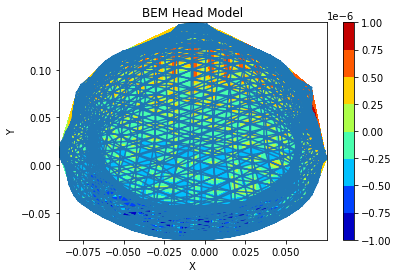

In [5]:

# Calculate the potential distribution for the dipolar solution in the infinite homogeneous medium
phi_dip_infinite = phi_dip(gridpos.T, dipole)

# Plot the potential distribution for the BEM head model
plt.figure()
plt.triplot(pos4[:, 0], pos4[:, 1], tri4)
plt.tricontourf(pos4[:, 0], pos4[:, 1], v, cmap='jet')
plt.colorbar()
plt.title('BEM Head Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

b)

In [6]:
# Get the source position from 'gridpos.npy'
rq = gridpos[source_index, :]
# Calculate the potential distribution at each scalp surface vertex
phi_dip_analytical = phi_dip(pos4.T, dipole, r_0=rq, sigma=sigma)


c)

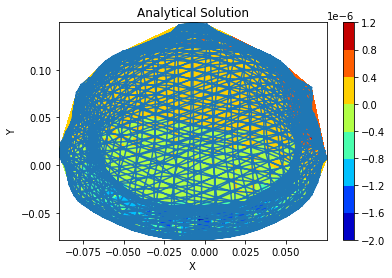

In [7]:
# Plot the potential distribution for the analytical solution
plt.figure()
plt.triplot(pos4[:, 0], pos4[:, 1], tri4)
plt.tricontourf(pos4[:, 0], pos4[:, 1], phi_dip_analytical, cmap='jet')
plt.colorbar()
plt.title('Analytical Solution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


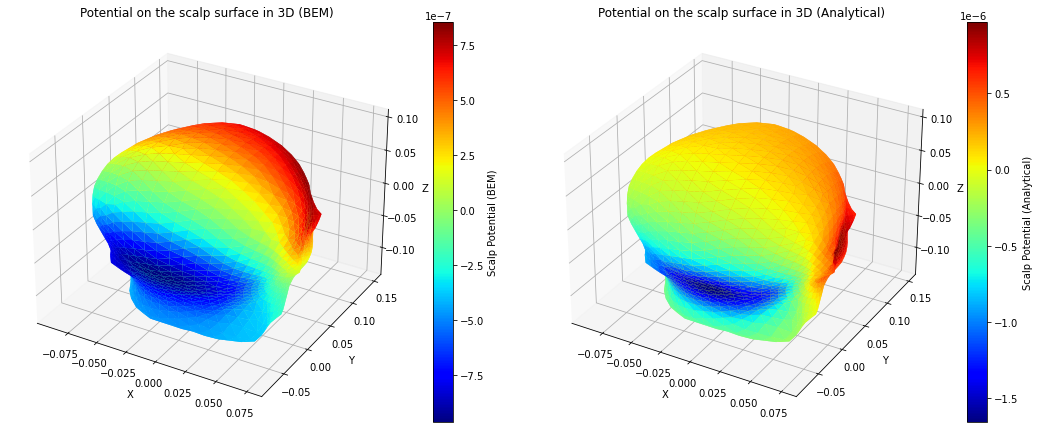

In [8]:
# Average potential across each triangle 
avg_phis_bem = np.mean(v[tri4], axis=1)

# Create colormap
absmax_bem = np.max(np.abs(avg_phis_bem))
mappy_bem = plt.cm.ScalarMappable(cmap=plt.cm.jet)
mappy_bem.set_clim([np.min(avg_phis_bem), np.max(avg_phis_bem)])
mappy_bem.set_array([])

# BEM solution
fig = plt.figure(figsize=[15,6])
ax = fig.add_subplot(121, projection='3d')  # Use 121 for side-by-side plots
trisurfplot_bem = ax.plot_trisurf(pos4[:, 0], pos4[:, 1], pos4[:, 2], triangles=tri4)
trisurfplot_bem.set_facecolors(mappy_bem.to_rgba(avg_phis_bem))
fig.colorbar(mappy_bem, ax=ax, label='Scalp Potential (BEM)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Potential on the scalp surface in 3D (BEM)')

#  analytical solution
avg_phis_analytical = np.mean(phi_dip_analytical[tri4], axis=1)

absmax_analytical = np.max(np.abs(avg_phis_analytical))
mappy_analytical = plt.cm.ScalarMappable(cmap=plt.cm.jet)
mappy_analytical.set_clim([np.min(avg_phis_analytical), np.max(avg_phis_analytical)])
mappy_analytical.set_array([])

ax2 = fig.add_subplot(122, projection='3d')  # Use 122 for side-by-side plots
trisurfplot_analytical = ax2.plot_trisurf(pos4[:, 0], pos4[:, 1], pos4[:, 2], triangles=tri4)
trisurfplot_analytical.set_facecolors(mappy_analytical.to_rgba(avg_phis_analytical))
fig.colorbar(mappy_analytical, ax=ax2, label='Scalp Potential (Analytical)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('Potential on the scalp surface in 3D (Analytical)')

plt.tight_layout()
plt.show()


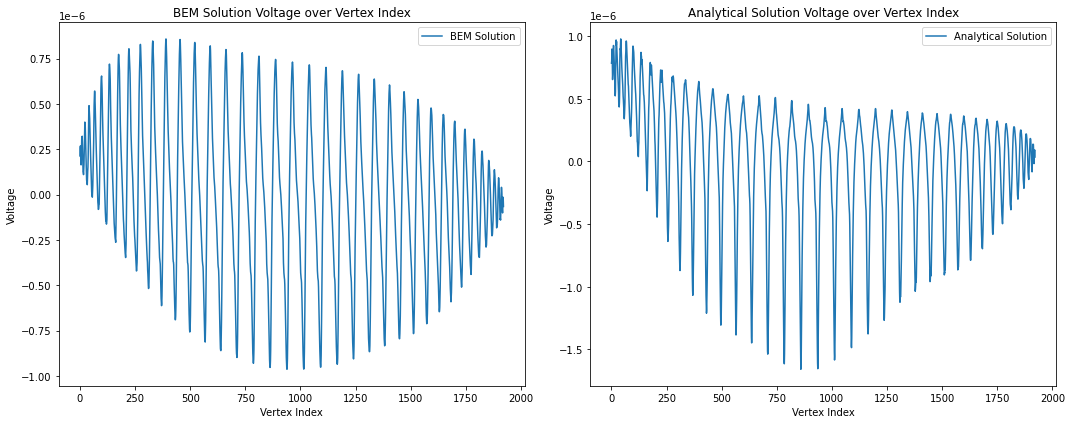

In [9]:
#d)
plt.figure(figsize=[15,6])

# BEM solution
plt.subplot(1, 2, 1)
plt.plot(v, label='BEM Solution')
plt.xlabel('Vertex Index')
plt.ylabel('Voltage')
plt.title('BEM Solution Voltage over Vertex Index')
plt.legend()

# Analytical solution
plt.subplot(1, 2, 2)
plt.plot(phi_dip_analytical, label='Analytical Solution')
plt.xlabel('Vertex Index')
plt.ylabel('Voltage')
plt.title('Analytical Solution Voltage over Vertex Index')
plt.legend()

plt.tight_layout()
plt.show()


e) Are the solutions equal? Investigate and explain the difference. 






insert text




## Task2: EEG spectra of motorimagery data (5 points)

The following data has been spatially filtered using Common Spatial Patterns (CSP) and epoched into trials belonging to different classes. The given code already selects the different class-wise epochs for your convenience.
We will now look at the spectra of the classes and plot the connected spatial pattern $\mathbf{A}$ on the scalp similar to sheet 2 task 5 using the bci_minitoolbox. The spatial pattern is already calculated.

**Tasks:**

a) Calculate the average power spectral densities for 'left','right' and 'foot' class epochs using the welch algorithm (np.welch) and plot them over the frequency. What can you investigate concerning the spectral peaks?

b) Plot the spatial pattern $\mathbf{A}$ connected to the CSP filter which was used on the EEG data. Use the *mnt_orig* variable together with bci.scalpmap from the bci_minitoolbox. What can you say about the pattern? How does that correspond to the spectra in a)?


In [14]:
fname = 'cspepo.npz'
epo, fs, clab, mnt, mrk_pos, mrk_class, mrk_className = bci.load_data(fname)
epo_left = epo[mrk_class==np.where(mrk_className=='left')[0]]
epo_right = epo[mrk_class==np.where(mrk_className=='right')[0]]
epo_foot = epo[mrk_class==np.where(mrk_className=='foot')[0]]
A=np.load('cspepo_A.npy')
mnt_orig=np.load('cspepo_mnt.npy')
print(epo_foot.shape)

(75, 1, 301)


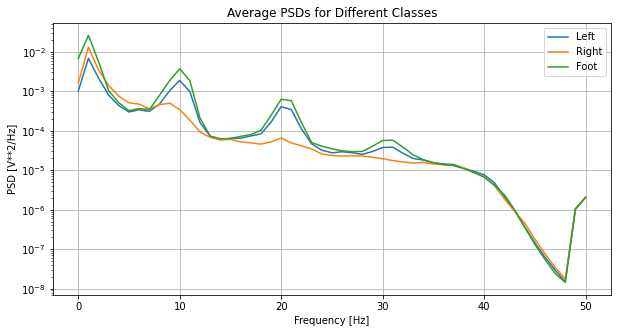

In [11]:
from scipy.signal import welch
import matplotlib.pyplot as plt


nperseg = fs  

# Calculate PSD for each class
freq, psd_left = welch(epo_left.squeeze(), fs, nperseg=nperseg, axis=-1)
_, psd_right = welch(epo_right.squeeze(), fs, nperseg=nperseg, axis=-1)
_, psd_foot = welch(epo_foot.squeeze(), fs, nperseg=nperseg, axis=-1)

# Average PSD across epochs
psd_left_avg = psd_left.mean(axis=0)
psd_right_avg = psd_right.mean(axis=0)
psd_foot_avg = psd_foot.mean(axis=0)

# Plot
plt.figure(figsize=[10,5])
plt.semilogy(freq, psd_left_avg, label='Left')
plt.semilogy(freq, psd_right_avg, label='Right')
plt.semilogy(freq, psd_foot_avg, label='Foot')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.title('Average PSDs for Different Classes')
plt.grid()
plt.show()


We see peaks around 1, 10, 20 and 30 Hz. However, for the Right PSD avg, we find almost no peak behaviour at 20 and 30 Hz. A peak around 1 Hz is associated with the delta rhythm, which is often linked to deep sleep or unconsciousness.The peak around 10 Hz corresponds to the alpha rhythm, which is typically associated with a relaxed, calm state of mind. Alpha waves are typically most prominent when a person is not focusing on the outside world and has their eyes closed, but is not tired or asleep. The peaks around 20 and 30 Hz correspond to the beta and gamma rhythms, respectively. Beta rhythms are typically associated with active, busy, or anxious thinking and active concentration. Gamma rhythms are associated with various types of cognitive processing and have been linked to consciousness and perception. The fact that the foot and left classes have higher power in these frequency bands could suggest a higher level of activity or engagement in the tasks related to these classes. In contrast, the right class, which shows almost no peak behavior, might indicate a more relaxed or less engaged state during the tasks associated with this class.

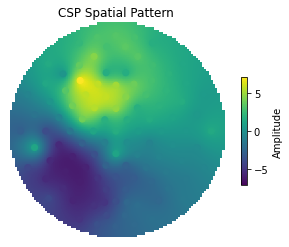

In [12]:
from bci_minitoolbox import scalpmap
scalpmap(mnt_orig, A, clim='sym', cb_label='Amplitude')
plt.title("CSP Spatial Pattern")
plt.show()
#We get higher amplitudes on on side - presumably right side?

## Task 3: The effect of the non-linear transfer function: simulation (5 points)


**Tasks:**

a) Write a function simulating a sine-wave $x(t)=b*sin(\omega t)+a=b*sin(2\pi f t)+a$. Simulate a time interval of 20s with a sampling rate of fs=200Hz and plot it over the first $0.5s$ with $b=1$ for the amplitude, $a=0$ for the offset and $f=10Hz$ for the frequency.

b) Calculate the Power-Spectral-Density (PSD) of the signal and plot it over the frequency. For calculating the PSD, use the welch algorithm (scipy.signal.welch) and plot it using a dB scale (10*log10(Pxx)). Clip the PSD below -80dB (i.e. only plot it until that value).

c) Use the logistic function $y(x)=\frac{1}{1+e^{-x}}$ on the signal $x(t)$ as a non-linear time-invariant amplitude transformation. Do this for all possible combinations of the following amplitudes and offsets of the sine wave: a={-2,-1,0, 1, 2} and b={0.5, 1, 10}. Calculate and plot the PSD as in b). Repeat the same with the step function (signtrafunc) and Gaussian RBF as non-linearities with $a=0$ and $b=1$.

d) The signal is a pure sine wave, which as a fourier transform has a single peak in the frequency spectrum. Explain the differences to the PSD of the cosine wave (b) and the effect of the non-linear transformations on the PSD (c).

## BONUS TASK Equivalent current dipole close to a conductivity change (5 bonus points)
A simple way of modeling the effect a change in conductivity between two homogeneous subspaces is the so-called "method of images": it can be used to solve the internal field of the source subspace by a superposition of the partial solution and a homogeneous solution. The electrical field/potential of a source distribution outside of the subspace is  homogeneous within and can be used to generate correct boundary conditions. This is then added to the partial solution to get correct boundary conditions. 

We will only look at a very simple and abstract case, the jump from a compartment containing the source with finite conductivity (the head) to a non-conductive subspace (e.g air outside the head). This is similar as in the lecture.

In this case, no current can leave the head and so the normal current on the boundary has to be $J_n (x=0) =0$. This resembles von-Neumann boundary conditions.

**Task:**

Imagine a subspace with finite conductivity while there is a sudden change to non-conductivity at a vertical line of $x=0$.

Use the functions phi_dip and J_dip from the first exercise sheet (copied below) to model the field of a dipole sitting at $r=[-1.5,0]$ in infinite homogeneous media. Use the same analytic solution in a different position and orientation to correct the boundary conditions. The boundary condition, here, is a restriction on the normal current to be zero while the potential can be arbitrary. Think about how to combine the source with a mirrored version of itself that produces zero normal (direction y) current at x=0.

Make a plot of the two variables in two dimensions similar to the one from sheet 1 task 5 from -10cm to 0cm for the x axes  -10cm to 10cm for the y axes in the x/y-plane for a dipole with dipole moment $\vec{Q}=[0,20]fAm$. Repeat the same with $\vec{Q}=[20,0]fAm$.

Plot the potential similar as in sheet 1 using the matlpotlib function plt.contour/contourf for plotting and the field strength using the function plt.streamplot. Draw both plots into the same figure.

*Hint: Think about how you can reach $J_n (x=0)=0$ by mirroring the infinite solution at the straight line $x=0$ using probably different values for the dipolar moment meaning the orientation.*

In [13]:
def phi_dip(r, Q, r_0=None,sigma=0.33):
    r=np.array(r)
    Q=np.array(Q)    
    if r_0 is not None:
        r_0=np.array(r_0)
        r=(r.T-r_0).T
    return 1/(4*np.pi*sigma)*(np.tensordot(Q,r,1))/np.power(np.linalg.norm(r,axis=0),3)

def J_dip(r, Q, r_0=None,sigma=0.33):
    r=np.array(r)
    Q=np.array(Q)
    if r_0 is not None:
        r_0=np.array(r_0)
        r=(r.T-r_0).T   
    nom=((3*np.tensordot(Q,r,1)*r/np.power(np.linalg.norm(r,axis=0),2)).T-Q).T
    return (1/(4*np.pi)*nom/np.power(np.linalg.norm(r,axis=0),3))

#initialize the variables (x and y in cm, p as a current dipole with 20fAm)
x=np.arange(-10,0,0.1)
y=np.arange(-10,10,0.1)
r_0=np.array([-1.5,0])*1e-2
Q=np.array([20,0])*1e-15

#create the meshgrid for calculation and plotting (in SI --> m)
XX,YY=np.meshgrid(x/100,y/100)


#Calculate the potential on the whole meshgrid 
phi=phi(blablabla)+phi(blablabla)
#Calculate the current density on the whole meshgrid 
J=J(blablabla)+J(blablabla)

#Now its your turn!

NameError: name 'phi' is not defined